PROJECT 2 - ECE 558 - Digital Imaging Systems  
Name: Viraj Sanap  
UnityID: vasanap  

Problem 1A

In [14]:
#Project 2 
#Imports
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

In [15]:
#Read image
colored_image = cv2.imread("wolves.png")
grey_image = cv2.cvtColor(colored_image,cv2.COLOR_BGR2GRAY)

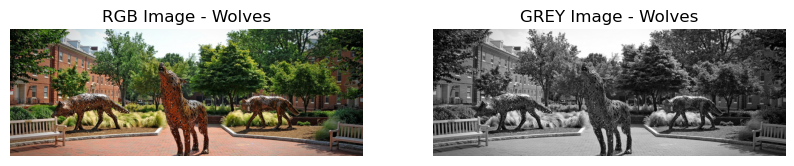

In [16]:
# Display the images side by side
colored_image_rgb = cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))  # Adjust the size as needed

# Display first image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.imshow(colored_image_rgb)
plt.title("RGB Image - Wolves")
plt.axis("off")

# Display second image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.imshow(grey_image, cmap="gray")
plt.title("GREY Image - Wolves")
plt.axis("off")

plt.show()

In [17]:
#View image
# cv2.imshow('image',grey_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows

Kernels

In [18]:
box_kernel =np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0
prewitt_kernel_mz = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_kernel_my = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
sobel_kernel_mx = np.array([[-1,0,1],[-2,0,-2],[-1,0,1]])
sobel_kernel_my = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
roberts_kernel_mx = np.array([[0,1],[-1,0]])
roberts_kernel_my = np.array([[1,0],[0,-1]])
first_order_kernel_x = np.array([[1,-1]])
first_order_kernel_y = np.array([[-1],[1]])
# print("Prewitt kernel Mz \n",prewitt_kernel_mz)
# print("Prewitt kernel My \n",prewitt_kernel_my)
# print("Sobel kernel Mx \n",sobel_kernel_mx)
# print("Sobel kernel My \n",sobel_kernel_my)
# print("Roberts kernel Mx \n",roberts_kernel_mx)
# print("Roberts kernel My \n",roberts_kernel_my)
# print("Box kernel \n",box_kernel) 

Padding

In [31]:

def add_padding(image: np.array, kernel_height: int, kernel_width: int, padding_mode: str) -> np.array:
    """Add padding to the image based on the specified padding mode."""
    if padding_mode not in ["zero", "wrap", "edge", "reflect"]:
        raise ValueError("Invalid padding mode specified.")

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Checking if the image is grayscale (2D) or color (3D)
    is_gray = len(image.shape) == 2
    padded_shape = (image.shape[0] + 2 * pad_height, image.shape[1] + 2 * pad_width) + (() if is_gray else (image.shape[2],))

    # Initialize padded image with the same data type as the input image
    padded_image = np.zeros(padded_shape, dtype=image.dtype)

    # Fill the center region with the original image
    if is_gray:
        padded_image[pad_height:pad_height + image.shape[0], pad_width:pad_width + image.shape[1]] = image
    else:
        padded_image[pad_height:pad_height + image.shape[0], pad_width:pad_width + image.shape[1], :] = image

    if padding_mode == "wrap":
        if is_gray:
            padded_image[:pad_height, pad_width:pad_width + image.shape[1]] = image[-pad_height:, :]
            padded_image[pad_height + image.shape[0]:, pad_width:pad_width + image.shape[1]] = image[:pad_height, :]
            padded_image[pad_height:pad_height + image.shape[0], :pad_width] = image[:, -pad_width:]
            padded_image[pad_height:pad_height + image.shape[0], pad_width + image.shape[1]:] = image[:, :pad_width]
        else:
            padded_image[:pad_height, pad_width:pad_width + image.shape[1], :] = image[-pad_height:, :, :]
            padded_image[pad_height + image.shape[0]:, pad_width:pad_width + image.shape[1], :] = image[:pad_height, :, :]
            padded_image[pad_height:pad_height + image.shape[0], :pad_width, :] = image[:, -pad_width:, :]
            padded_image[pad_height:pad_height + image.shape[0], pad_width + image.shape[1]:, :] = image[:, :pad_width, :]

    elif padding_mode == "edge":
        if is_gray:
            padded_image[:pad_height, pad_width:pad_width + image.shape[1]] = image[0:1, :]
            padded_image[pad_height + image.shape[0]:, pad_width:pad_width + image.shape[1]] = image[-1:, :]
            padded_image[pad_height:pad_height + image.shape[0], :pad_width] = image[:, 0:1]
            padded_image[pad_height:pad_height + image.shape[0], pad_width + image.shape[1]:] = image[:, -1:]
        else:
            padded_image[:pad_height, pad_width:pad_width + image.shape[1], :] = image[0:1, :, :]
            padded_image[pad_height + image.shape[0]:, pad_width:pad_width + image.shape[1], :] = image[-1:, :, :]
            padded_image[pad_height:pad_height + image.shape[0], :pad_width, :] = image[:, 0:1, :]
            padded_image[pad_height:pad_height + image.shape[0], pad_width + image.shape[1]:, :] = image[:, -1:, :]

    elif padding_mode == "reflect":
        if is_gray:
            padded_image[:pad_height, pad_width:pad_width + image.shape[1]] = image[pad_height-1::-1, :]
            padded_image[pad_height + image.shape[0]:, pad_width:pad_width + image.shape[1]] = image[-1:-pad_height-1:-1, :]
            padded_image[pad_height:pad_height + image.shape[0], :pad_width] = image[:, pad_width-1::-1]
            padded_image[pad_height:pad_height + image.shape[0], pad_width + image.shape[1]:] = image[:, -1:-pad_width-1:-1]
        else:
            padded_image[:pad_height, pad_width:pad_width + image.shape[1], :] = image[pad_height-1::-1, :, :]
            padded_image[pad_height + image.shape[0]:, pad_width:pad_width + image.shape[1], :] = image[-1:-pad_height-1:-1, :, :]
            padded_image[pad_height:pad_height + image.shape[0], :pad_width, :] = image[:, pad_width-1::-1, :]
            padded_image[pad_height:pad_height + image.shape[0], pad_width + image.shape[1]:, :] = image[:, -1:-pad_width-1:-1, :]

    return padded_image




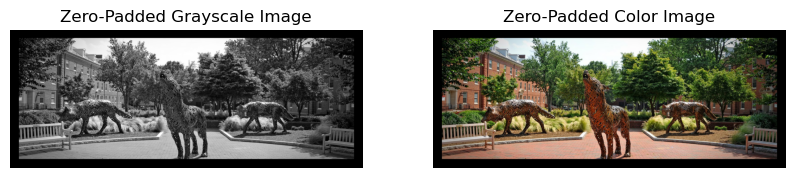

In [32]:
# Zero padding application
zero_padded_clr_img = add_padding(colored_image_rgb,80,80,"zero") 
zero_padded_grey_img = add_padding(grey_image,80,80,"zero")


# Display the images side by side
plt.figure(figsize=(10, 5))  


plt.subplot(1, 2, 1)  
plt.imshow(zero_padded_grey_img, cmap="gray")
plt.title("Zero-Padded Grayscale Image")
plt.axis("off")


plt.subplot(1, 2, 2)  
plt.imshow(zero_padded_clr_img)
plt.title("Zero-Padded Color Image")
plt.axis("off")

plt.show()

In [33]:
def display_padding_scenarios(img: np.array, kernel_height: int, kernel_width: int):
    """
    Displays the original image alongside the padded images for each padding type.

    Args:
        img (np.array): Input image (2D grayscale or 3D color image).
        kernel_height (int): Kernel height for padding calculation.
        kernel_width (int): Kernel width for padding calculation.
    """
    # List of padding modes
    padding_modes = ["zero", "wrap", "edge", "reflect"]
    
    # Plot the original image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, len(padding_modes) + 1, 1)
    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.title("Original Image")
    plt.axis("off")

    # Plot each padded image for the different padding modes
    for i, mode in enumerate(padding_modes, start=2):
        padded_img = add_padding(img, kernel_height, kernel_width, padding_mode=mode)
        plt.subplot(1, len(padding_modes) + 1, i)
        plt.imshow(padded_img, cmap='gray' if len(img.shape) == 2 else None)
        plt.title(f"{mode.capitalize()} Padding")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

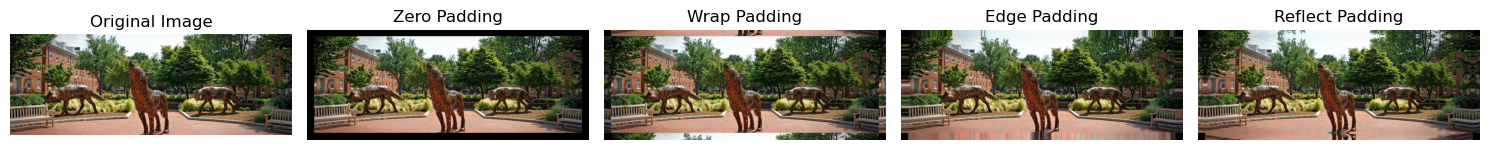

In [34]:
display_padding_scenarios(colored_image_rgb,80,80)

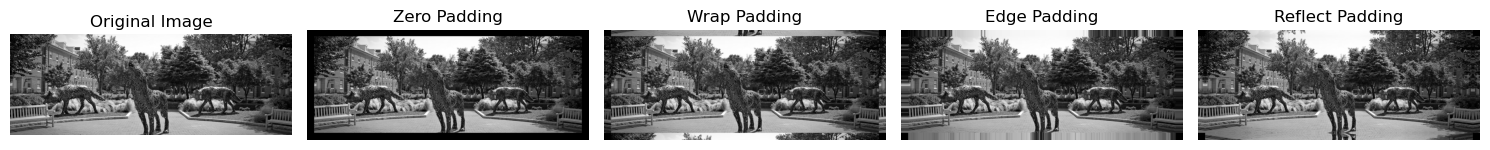

In [35]:
display_padding_scenarios(grey_image,80,80)

In [36]:
def conv2(image: np.array, kernel: np.array, padding_type: str = "zero") -> np.array:
    """Apply a convolution to a grayscale or RGB image.

    Args:
        image (np.array): Input image (2D grayscale or 3D RGB).
        kernel (np.array): Convolution kernel (can be 3x3, 1x2, or 2x1).
        padding_type (str): Type of padding ('zero', 'wrap', 'edge', 'reflect').

    Returns:
        np.array: Convolved image.
    """
    kernel = np.array(kernel)
    kernel_height, kernel_width = kernel.shape

    # Apply padding using the specified padding type
    padded_img = add_padding(image, kernel_height, kernel_width, padding_mode=padding_type)
    output_img = np.zeros_like(image)

    if image.ndim == 2:  # Grayscale image
        for i in range(image.shape[0]):  # height
            for j in range(image.shape[1]):  # width
                output_img[i, j] = (kernel * padded_img[i:i + kernel_height, j:j + kernel_width]).sum()

    elif image.ndim == 3:  # RGB image
        for i in range(image.shape[0]):  # height
            for j in range(image.shape[1]):  # width
                for c in range(image.shape[2]):  
                    output_img[i, j, c] = (kernel * padded_img[i:i + kernel_height, j:j + kernel_width, c]).sum()

    return output_img


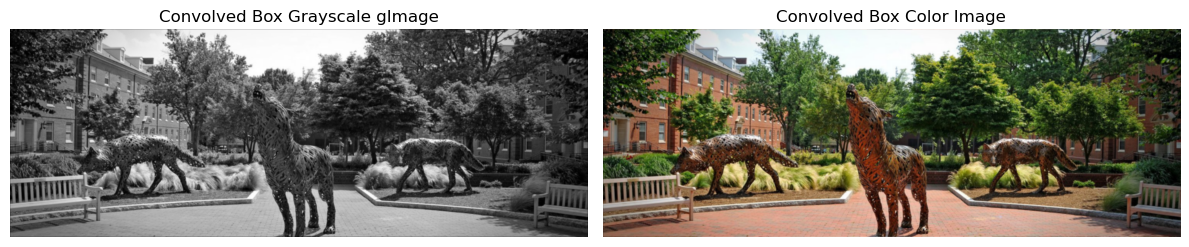

In [37]:
conv_box_gray = conv2(grey_image, box_kernel, padding_type="zero")
conv_box_color = conv2(colored_image_rgb, box_kernel, padding_type="wrap")

conv_prewitt_gray = conv2(grey_image, prewitt_kernel_my, padding_type="zero")
conv_prewitt_color = conv2(colored_image_rgb, prewitt_kernel_mz, padding_type="edge")

conv_sobel_gray = conv2(grey_image, sobel_kernel_mx, padding_type="zero")
conv_sobel_color = conv2(colored_image_rgb, sobel_kernel_my, padding_type="reflect")

conv_roberts_gray = conv2(grey_image, roberts_kernel_mx, padding_type="zero")
conv_roberts_color = conv2(colored_image_rgb, roberts_kernel_my, padding_type="zero")


plt.figure(figsize=(12, 6))

# Grayscale image and its convolution
plt.subplot(1, 2, 1)
plt.imshow(conv_box_gray, cmap='gray')
plt.title("Convolved Box Grayscale gImage")
plt.axis("off")

# Color image and its convolution
plt.subplot(1, 2, 2)
plt.imshow(conv_box_color)
plt.title("Convolved Box Color Image")
plt.axis("off")

plt.tight_layout()
plt.show()

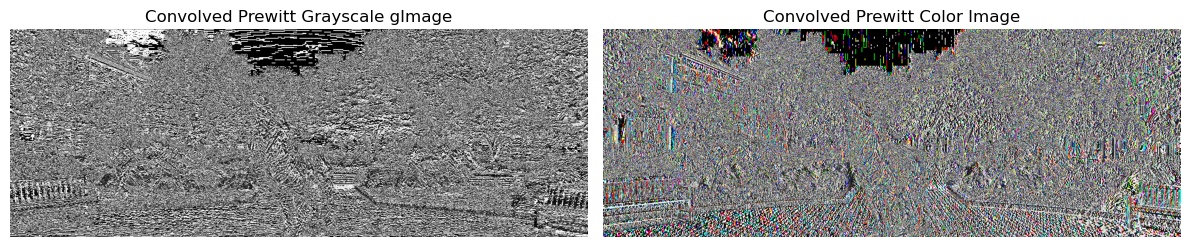

In [38]:

plt.figure(figsize=(12, 6))

# Grayscale image and its convolution
plt.subplot(1, 2, 1)
plt.imshow(conv_prewitt_gray, cmap='gray')
plt.title("Convolved Prewitt Grayscale gImage")
plt.axis("off")

# Color image and its convolution
plt.subplot(1, 2, 2)
plt.imshow(conv_prewitt_color)
plt.title("Convolved Prewitt Color Image")
plt.axis("off")

plt.tight_layout()
plt.show()

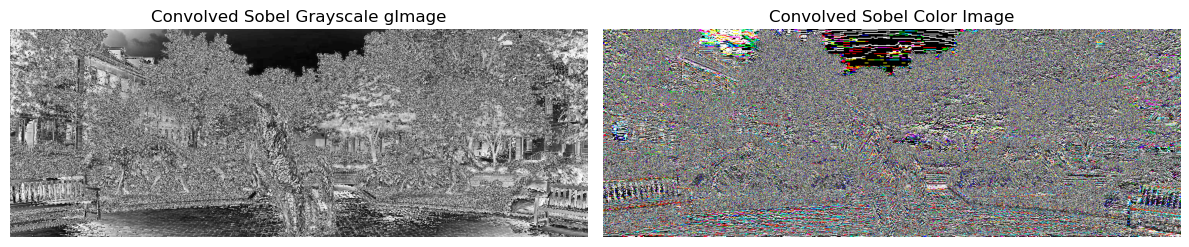

In [39]:

plt.figure(figsize=(12, 6))

# Grayscale image and its convolution
plt.subplot(1, 2, 1)
plt.imshow(conv_sobel_gray, cmap='gray')
plt.title("Convolved Sobel Grayscale gImage")
plt.axis("off")

# Color image and its convolution
plt.subplot(1, 2, 2)
plt.imshow(conv_sobel_color)
plt.title("Convolved Sobel Color Image")
plt.axis("off")

plt.tight_layout()
plt.show()

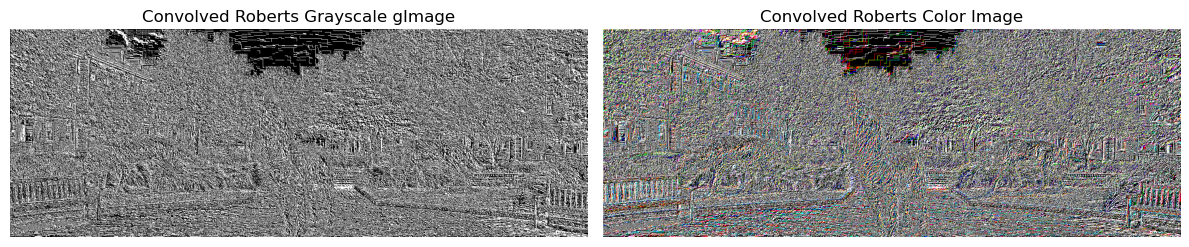

In [40]:

plt.figure(figsize=(12, 6))

# Grayscale image and its convolution
plt.subplot(1, 2, 1)
plt.imshow(conv_roberts_gray, cmap='gray')
plt.title("Convolved Roberts Grayscale gImage")
plt.axis("off")

# Color image and its convolution
plt.subplot(1, 2, 2)
plt.imshow(conv_roberts_color)
plt.title("Convolved Roberts Color Image")
plt.axis("off")

plt.tight_layout()
plt.show()

TESTING FOR ALL KERNELS AND PADDING TYPES

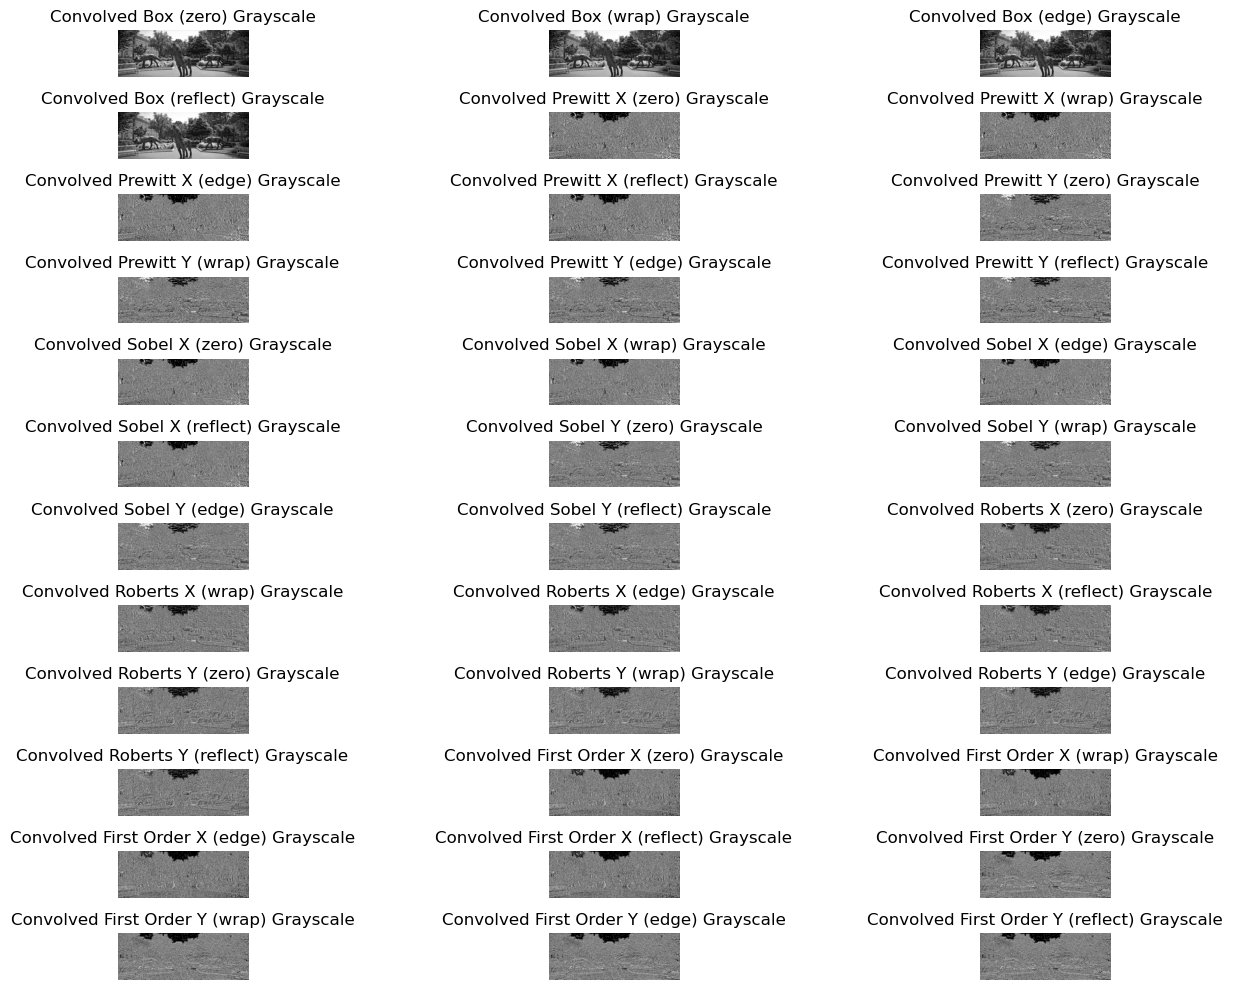

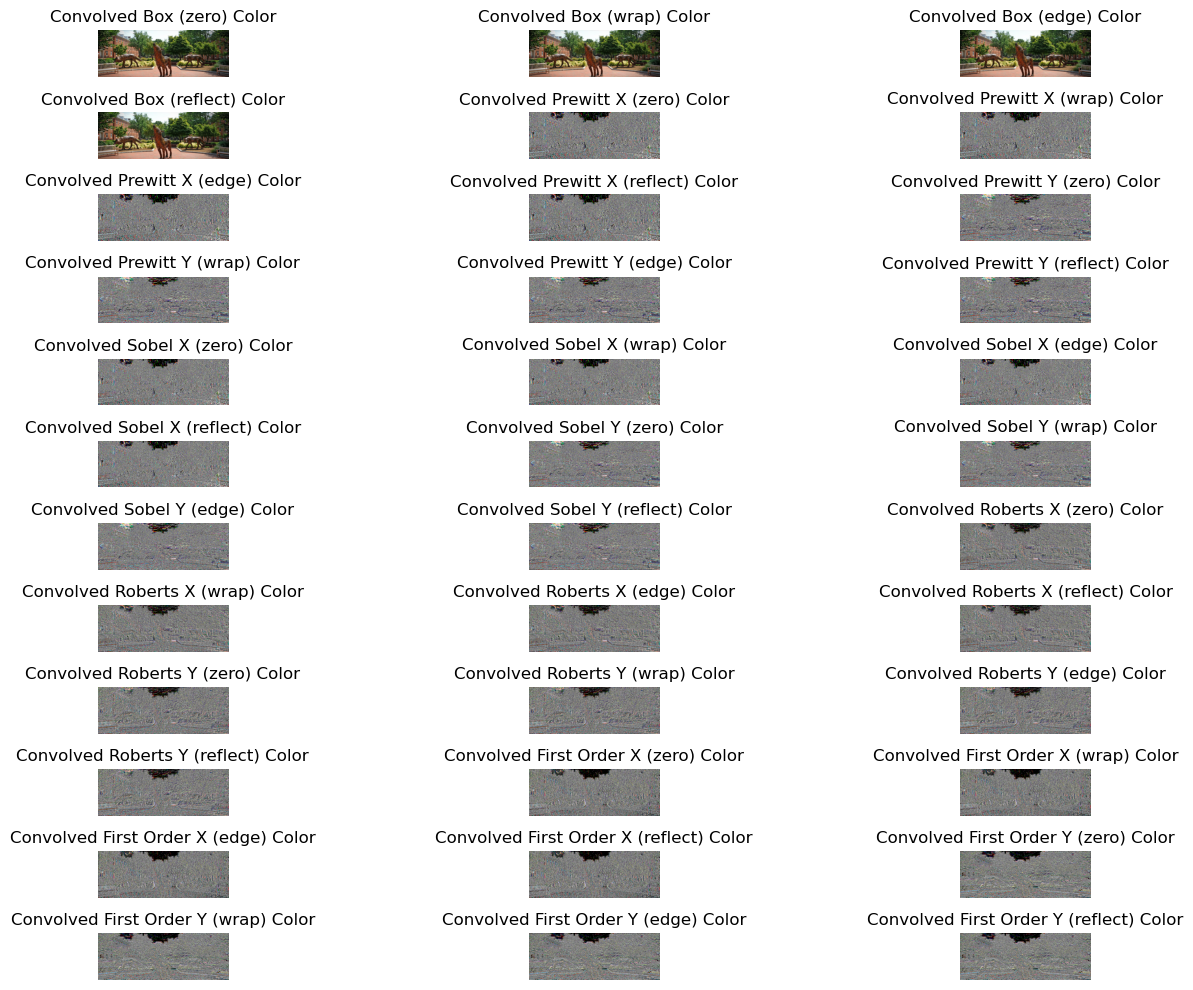

In [43]:
kernels = {
    "Box": np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9.0,
    "Prewitt X": np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
    "Prewitt Y": np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]),
    "Sobel X": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Sobel Y": np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]),
    "Roberts X": np.array([[0, 1], [-1, 0]]),
    "Roberts Y": np.array([[1, 0], [0, -1]]),
    "First Order X": np.array([[1, -1]]),
    "First Order Y": np.array([[-1], [1]])
}


# Padding types to use (e.g., zero-padding)
padding_types = ["zero", "wrap", "edge", "reflect"]

# Convolve grayscale and color images with each kernel and padding type
convolved_images_gray = []
convolved_images_color = []

def add_padding2(image: np.array, kernel_height: int, kernel_width: int, padding_mode: str) -> np.array:
    """Add padding to the image based on the specified padding mode using NumPy's np.pad."""
    if padding_mode not in ["zero", "wrap", "edge", "reflect"]:
        raise ValueError("Invalid padding mode specified.")
    
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Define padding sizes for np.pad
    padding_sizes = ((pad_height, pad_height), (pad_width, pad_width)) if len(image.shape) == 2 else ((pad_height, pad_height), (pad_width, pad_width), (0, 0))

    if padding_mode == "zero":
        padded_image = np.pad(image, padding_sizes, mode='constant', constant_values=0)
    elif padding_mode == "wrap":
        padded_image = np.pad(image, padding_sizes, mode='wrap')
    elif padding_mode == "edge":
        padded_image = np.pad(image, padding_sizes, mode='edge')
    elif padding_mode == "reflect":
        padded_image = np.pad(image, padding_sizes, mode='reflect')

    return padded_image

def conv22(image: np.array, kernel: np.array, padding_type: str = "zero") -> np.array:
    
    kernel = np.array(kernel)
    kernel_height, kernel_width = kernel.shape

    # Apply padding using the specified padding type
    padded_img = add_padding2(image, kernel_height, kernel_width, padding_mode=padding_type)
    output_img = np.zeros_like(image)

    if image.ndim == 2:  # Grayscale image
        for i in range(image.shape[0]):  # height
            for j in range(image.shape[1]):  # width
                output_img[i, j] = (kernel * padded_img[i:i + kernel_height, j:j + kernel_width]).sum()

    elif image.ndim == 3:  # RGB image
        for i in range(image.shape[0]):  # height
            for j in range(image.shape[1]):  # width
                for c in range(image.shape[2]):  
                    output_img[i, j, c] = (kernel * padded_img[i:i + kernel_height, j:j + kernel_width, c]).sum()

    return output_img

for kernel_name, kernel in kernels.items():
    for padding in padding_types:
        # Grayscale convolution
        conv_gray = conv22(grey_image, kernel, padding_type=padding)
        convolved_images_gray.append((f"{kernel_name} ({padding})", conv_gray))
        
        # Color convolution
        conv_color = conv22(colored_image_rgb, kernel, padding_type=padding)
        convolved_images_color.append((f"{kernel_name} ({padding})", conv_color))

# Display settings
num_kernels = len(kernels) * len(padding_types)
num_cols = 3  # Number of columns to display images
num_rows_gray = (num_kernels + num_cols - 1) // num_cols  # Calculate rows needed for gray images
num_rows_color = (num_kernels + num_cols - 1) // num_cols  # Calculate rows needed for color images

# Display grayscale convolutions
plt.figure(figsize=(15, 10))
for i, (kernel_name, conv_img) in enumerate(convolved_images_gray):
    plt.subplot(num_rows_gray, num_cols, i + 1)
    plt.imshow(conv_img, cmap='gray')
    plt.title(f"Convolved {kernel_name} Grayscale")
    plt.axis("off")
plt.tight_layout()
plt.show()

# Display color convolutions
plt.figure(figsize=(15, 10))
for i, (kernel_name, conv_img) in enumerate(convolved_images_color):
    plt.subplot(num_rows_color, num_cols, i + 1)
    plt.imshow(conv_img.astype(np.uint8))  # Convert to uint8 for display
    plt.title(f"Convolved {kernel_name} Color")
    plt.axis("off")
plt.tight_layout()
plt.show()

Problem 1B

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


(-0.5, 6.5, 6.5, -0.5)

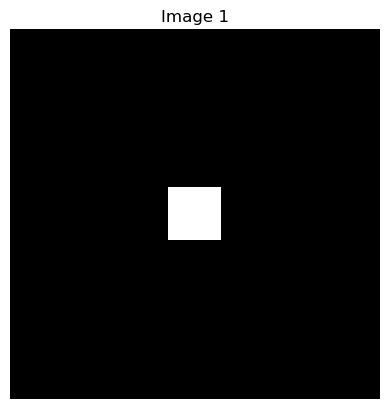

In [29]:
unit_impulse = np.zeros((1024,1024))
unit_impulse[512,512] = 1
print(unit_impulse[509:516,509:516])
plt.imshow(unit_impulse[509:516,509:516],cmap='gray')
plt.title("Image 1")
plt.axis("off")


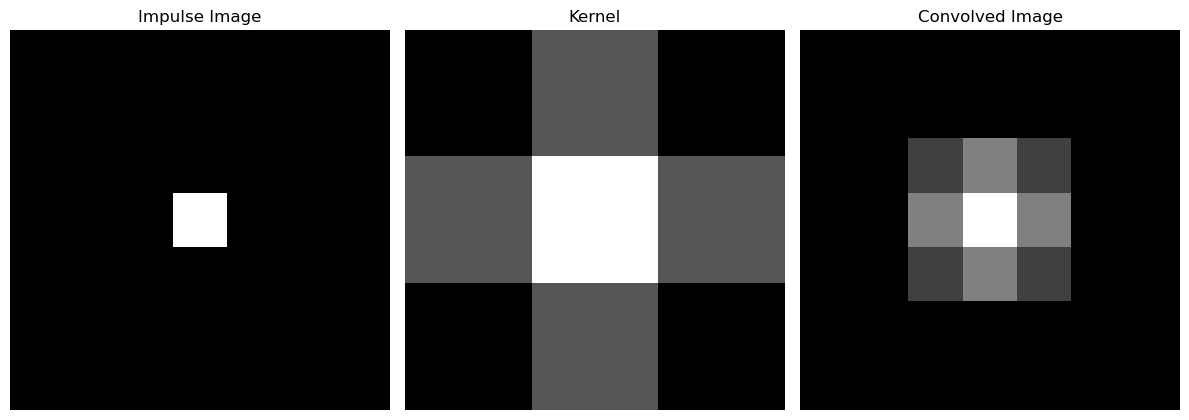

In [30]:
# Create a grey image of size 1024x1024 with a unit impulse at the center
image_size = (1024, 1024)
impulse_image = np.zeros(image_size, dtype=np.float32)
impulse_image[image_size[0] // 2, image_size[1] // 2] = 255  # Unit impulse at the center

# Define a sample 3x3 kernel (e.g., Gaussian kernel for blurring)
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]], dtype=np.float32)
kernel /= kernel.sum()  # Normalize the kernel

# Apply padding to the impulse image
pad_width = kernel.shape[0] // 2
padded_image = np.pad(impulse_image, pad_width, mode='constant', constant_values=0)

# Perform convolution
impulse_convolved_image = np.zeros_like(impulse_image)
for i in range(impulse_convolved_image.shape[0]):
    for j in range(impulse_convolved_image.shape[1]):
        # Extract the region of interest
        region = padded_image[i:i + kernel.shape[0], j:j + kernel.shape[1]]
        # Apply the kernel to the region and sum the results
        impulse_convolved_image[i, j] = np.sum(region * kernel)

# Visualization
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.title("Impulse Image")
plt.imshow(impulse_image[509:516,509:516], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Kernel")
plt.imshow(kernel, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Convolved Image")
plt.imshow(impulse_convolved_image[509:516,509:516], cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

Using Conv2 function

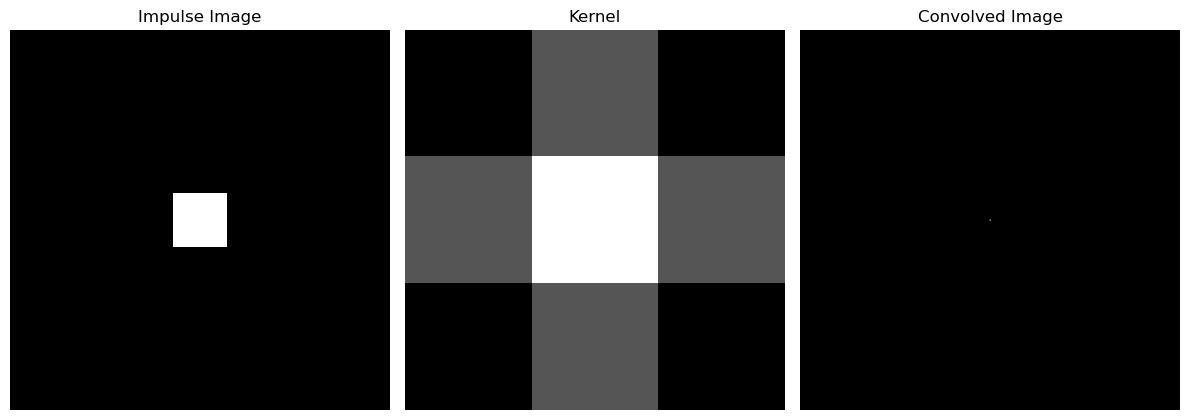

In [34]:
image_size = (1024, 1024)
impulse_image = np.zeros(image_size, dtype=np.float32)
impulse_image[image_size[0] // 2, image_size[1] // 2] = 255  # Unit impulse at (512, 512)


uconvolved_image = conv2(impulse_image, box_kernel, "zero")

# Step 4: Visualization
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.title("Impulse Image")
plt.imshow(impulse_image[509:516,509:516], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Kernel")
plt.imshow(kernel, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Convolved Image")
plt.imshow(uconvolved_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [32]:
uconvolved_image[509:516,509:516]

array([[ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      , 28.333334, 28.333334, 28.333334,  0.      ,
         0.      ],
       [ 0.      ,  0.      , 28.333334, 28.333334, 28.333334,  0.      ,
         0.      ],
       [ 0.      ,  0.      , 28.333334, 28.333334, 28.333334,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ]], dtype=float32)

In [33]:
unitconv2 = conv2(unit_impulse,kernel,"zero")
unitconv2[509:516,509:516]

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.0625, 0.125 , 0.0625, 0.    , 0.    ],
       [0.    , 0.    , 0.125 , 0.25  , 0.125 , 0.    , 0.    ],
       [0.    , 0.    , 0.0625, 0.125 , 0.0625, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ]])